In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pickle
from sklearn.preprocessing import StandardScaler

## 1) Importing Data 

In [2]:
sp500=yf.download('^NSEI',start="2011-01-01", end="2015-12-31",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,6177.450195,6178.549805,6147.200195,6157.600098,6157.600098,0
2011-01-04,6172.750000,6181.049805,6124.399902,6146.350098,6146.350098,0
2011-01-05,6141.350098,6141.350098,6062.350098,6079.799805,6079.799805,0
2011-01-06,6107.000000,6116.149902,6022.299805,6048.250000,6048.250000,0
2011-01-07,6030.899902,6051.200195,5883.600098,5904.600098,5904.600098,0


In [4]:
sp500['Returns %']=sp500['Adj Close'].diff() / sp500['Adj Close']

In [5]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Returns %
Date,,,,,,,
2011-01-03,6177.450195,6178.549805,6147.200195,6157.600098,6157.600098,0,NaN
2011-01-04,6172.750000,6181.049805,6124.399902,6146.350098,6146.350098,0,-0.001830
2011-01-05,6141.350098,6141.350098,6062.350098,6079.799805,6079.799805,0,-0.010946
2011-01-06,6107.000000,6116.149902,6022.299805,6048.250000,6048.250000,0,-0.005216
2011-01-07,6030.899902,6051.200195,5883.600098,5904.600098,5904.600098,0,-0.024328


<AxesSubplot:xlabel='Date'>

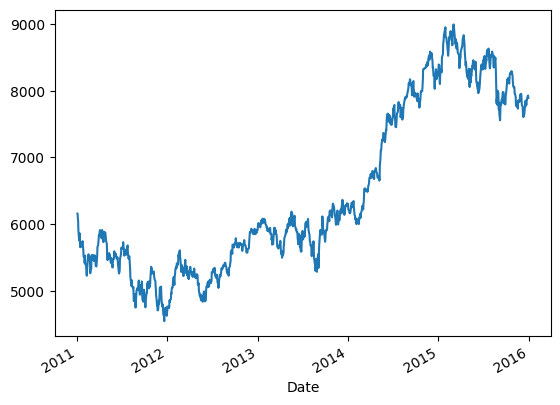

In [6]:
sp500['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

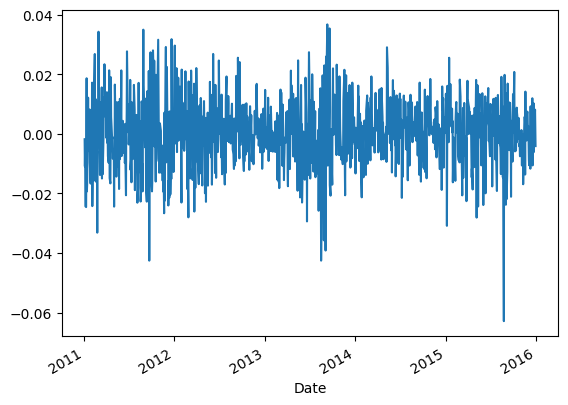

In [7]:
sp500['Returns %'].plot()

In [8]:
# sp500['Adj Close'].ewm(span=100).mean().plot()

In [9]:
# sp500['Adj Close']=sp500['Adj Close'].ewm(span=80).mean()

<AxesSubplot:xlabel='Date'>

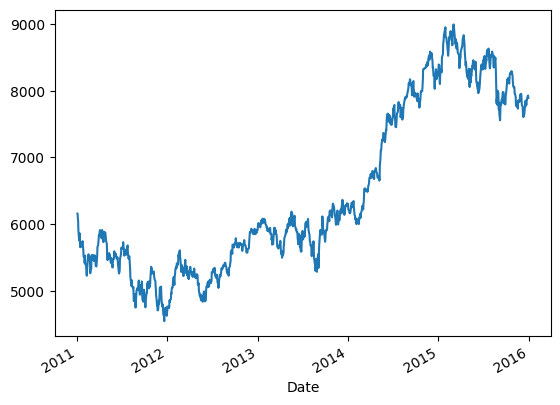

In [10]:
sp500['Adj Close'].plot()

The cyclical component represents phenomena that happen across seasonal periods. Cyclical patterns do not have a fixed period like seasonal patterns do. An example of a cyclical pattern is the cycles of boom and bust that stock markets experience in response to world events. <br>
This data seems to have cyclical component with no consistent cyclicity. So instead of decomposing it into trend, seasonality, noise, we would just keep it as it is.

In [11]:
sp500['Adj Close'].shape

(1214,)

Figure(640x480)


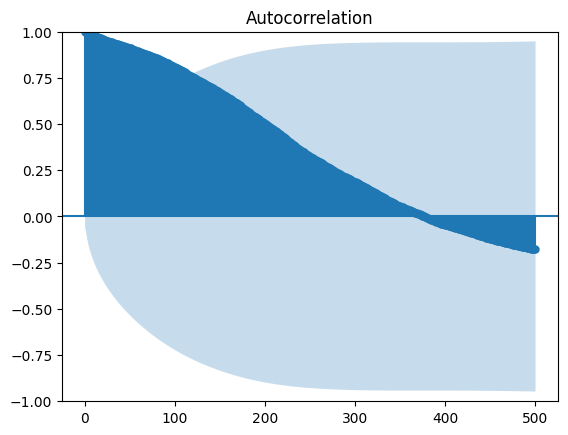

In [12]:
print(plot_acf(sp500['Adj Close'],lags=500))

Also autocorrelation graph shows no seasonal pattern.

## 4) Model

In [13]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Returns %
Date,,,,,,,
2011-01-03,6177.450195,6178.549805,6147.200195,6157.600098,6157.600098,0,NaN
2011-01-04,6172.750000,6181.049805,6124.399902,6146.350098,6146.350098,0,-0.001830
2011-01-05,6141.350098,6141.350098,6062.350098,6079.799805,6079.799805,0,-0.010946
2011-01-06,6107.000000,6116.149902,6022.299805,6048.250000,6048.250000,0,-0.005216
2011-01-07,6030.899902,6051.200195,5883.600098,5904.600098,5904.600098,0,-0.024328


In [14]:
'''with open('nifty_08_12.pkl', 'wb') as f:
    pickle.dump(sar, f) '''

"with open('nifty_08_12.pkl', 'wb') as f:\n    pickle.dump(sar, f) "

In [15]:
'''with open('nifty_08_12.pkl', 'rb') as f:
    sar = pickle.load(f) '''

"with open('nifty_08_12.pkl', 'rb') as f:\n    sar = pickle.load(f) "

In [16]:
sp500_fore=yf.download('^NSEI',start="2016-01-01", end="2016-03-08",interval='1d')
sp500_fore['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2016-01-04    7791.299805
2016-01-05    7784.649902
2016-01-06    7741.000000
2016-01-07    7568.299805
2016-01-08    7601.350098
2016-01-11    7563.850098
2016-01-12    7510.299805
2016-01-13    7562.399902
2016-01-14    7536.799805
2016-01-15    7437.799805
2016-01-18    7351.000000
2016-01-19    7435.100098
2016-01-20    7309.299805
2016-01-21    7276.799805
2016-01-22    7422.450195
2016-01-25    7436.149902
2016-01-27    7437.750000
2016-01-28    7424.649902
2016-01-29    7563.549805
2016-02-01    7555.950195
2016-02-02    7455.549805
2016-02-03    7361.799805
2016-02-04    7404.000000
2016-02-05    7489.100098
2016-02-08    7387.250000
2016-02-09    7298.200195
2016-02-10    7215.700195
2016-02-11    6976.350098
2016-02-12    6980.950195
2016-02-15    7162.950195
2016-02-16    7048.250000
2016-02-17    7108.450195
2016-02-18    7191.750000
2016-02-19    7210.750000
2016-02-22    7234.549805
2016-02-23    7109.549805
2016-02-24    7018.700195
2016-02-25    6970.600098
2016-02

In [17]:
sp500_fore['Returns %']=sp500_fore['Adj Close'].diff() / sp500_fore['Adj Close']

In [18]:
sp500_fore.head()

,Open,High,Low,Close,Adj Close,Volume,Returns %
Date,,,,,,,
2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700,NaN
2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200,-0.000854
2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100,-0.005639
2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900,-0.022819
2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400,0.004348


In [19]:
# np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1)

In [20]:
# np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1).append(sp500_fore['Adj Close'])

In [21]:
# non seasonal
def dynamic_pred(df,df1):
    len_df=len(df)
    pred_df=pd.Series()
    for y,x in df1.items():
        sar = sm.tsa.statespace.SARIMAX(df, 
                                order=(1,0,1), 
                                seasonal_order=(1,0,0,45), 
                                trend='c').fit()
        pred=sar.forecast(steps=1)
        
        x=pd.Series([x],index=[y])
        pred.index=x.index
        pred_df=pred_df.append(pred)
        if len(df)==len_df+len(df1):
            break
        else:
            df=df.append(x)
              
    return pred_df

In [22]:
sp500_for=dynamic_pred(np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1),np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1))

C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pred_df=pd.Series()
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_14348\4164044962.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)


In [27]:
np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1).index

DatetimeIndex(['2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
               '2016-01-15', '2016-01-18', '2016-01-19', '2016-01-20',
               '2016-01-21', '2016-01-22', '2016-01-25', '2016-01-27',
               '2016-01-28', '2016-01-29', '2016-02-01', '2016-02-02',
               '2016-02-03', '2016-02-04', '2016-02-05', '2016-02-08',
               '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12',
               '2016-02-15', '2016-02-16', '2016-02-17', '2016-02-18',
               '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24',
               '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01',
               '2016-03-02', '2016-03-03', '2016-03-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [33]:
import matplotlib.pyplot as plt

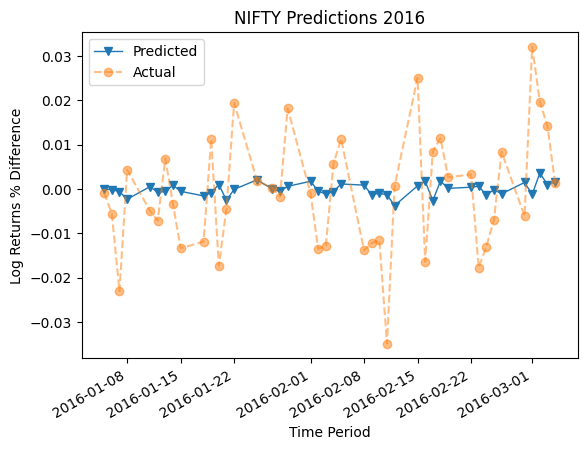

In [73]:
import matplotlib.pyplot as plt
sp500_for.plot(marker='v',linewidth=1)
np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1).plot(xlabel='Time Period',ylabel='Log Returns % Difference',linestyle='--',marker='o',alpha=0.5,legend='Actual')
plt.legend(['Predicted','Actual'])
plt.title('NIFTY Predictions 2016')
plt.savefig('ppt_pics/NIFTY_predictions_2016.png')

In [69]:
# np.sign(np.array(sp500_for))==np.sign(np.array(np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1)))

In [77]:
def accuracy_sarimax(df1,df2):
    x=np.sign(np.array(df1))==np.sign(np.array(df2))
    
    return sum(x) / len(x)

In [83]:
acc_nifty_ns_11_15=accuracy_sarimax(sp500_for,np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1))
acc_nifty_ns_11_15

0.5813953488372093

In [79]:
from sklearn.metrics import r2_score
r2_score(np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1), sp500_for)

0.018246943308921182

RMSE: 0.01


In [72]:
%store acc_nifty_ns_11_15

Stored 'acc_nifty_ns_11_15' (float64)
